In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LoanDF=pd.read_csv("Loan_Approval_Data.csv")
LoanDF.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
LoanDF.shape

(614, 13)

In [4]:
LoanDF.duplicated().sum()
LoanDF.drop_duplicates(inplace=True)

### Defining Problem Statement
* Target :- Predict the Loan_status (Y/N) Approve or reject based on predictors 
* Predictors :- Gender,Married,education,Income,etc.

### Analysing Distribution of Target Variable

<AxesSubplot:xlabel='Loan_Status'>

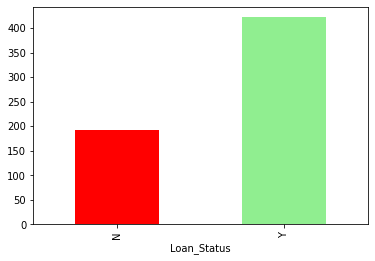

In [5]:
LoanDF.groupby('Loan_Status').size().plot(kind='bar',color=['red','lightgreen'])


* Distribution target is good and suitable for ML

### Basic Data Exploration
* info()
* describe()
* nunique()

In [6]:
LoanDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
LoanDF.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [8]:
LoanDF.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### Exploration Interpretation
* Continuous Predictors:-ApplicantIncome,CoapplicantIncome,LoanAMount,Term
* Categorical:Gender,Married,Dependents,etc
* Qualitative (<b>Rejected</b>):- Loan_ID
* Target :- Loan_Status

In [9]:
# Removing Useless Column
LoanDF.drop('Loan_ID',axis=1,inplace=True)

In [10]:
Conti=['ApplicantIncome','CoapplicantIncome','LoanAmount']
Categ=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
Target='Loan_Status'

### Univariate Analysis
* Continuous Predictors

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

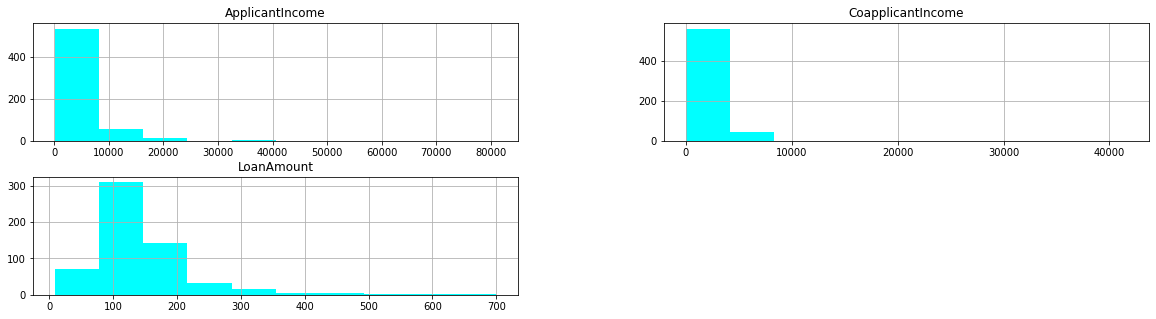

In [11]:
LoanDF[Conti].hist(figsize=(20,5),color='cyan')

* Treating The Outliars for ApplicantIncome and CoapplicantIncome with Logical Business value

In [12]:
LoanDF['ApplicantIncome'][LoanDF['ApplicantIncome']<30000].sort_values(ascending=False)

126    23803
506    20833
284    20667
308    20233
130    20166
       ...  
188      674
500      645
600      416
468      210
216      150
Name: ApplicantIncome, Length: 607, dtype: int64

In [13]:
LoanDF['ApplicantIncome'][LoanDF['ApplicantIncome']>30000]=23803

In [14]:
LoanDF['CoapplicantIncome'][LoanDF['CoapplicantIncome']<10000].sort_values(ascending=False)

122    8980.0
444    8333.0
12     8106.0
372    7873.0
135    7750.0
        ...  
278       0.0
274       0.0
271       0.0
270       0.0
613       0.0
Name: CoapplicantIncome, Length: 608, dtype: float64

In [15]:
LoanDF['CoapplicantIncome'][LoanDF['CoapplicantIncome']>10000]=8980

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>, <AxesSubplot:>]],
      dtype=object)

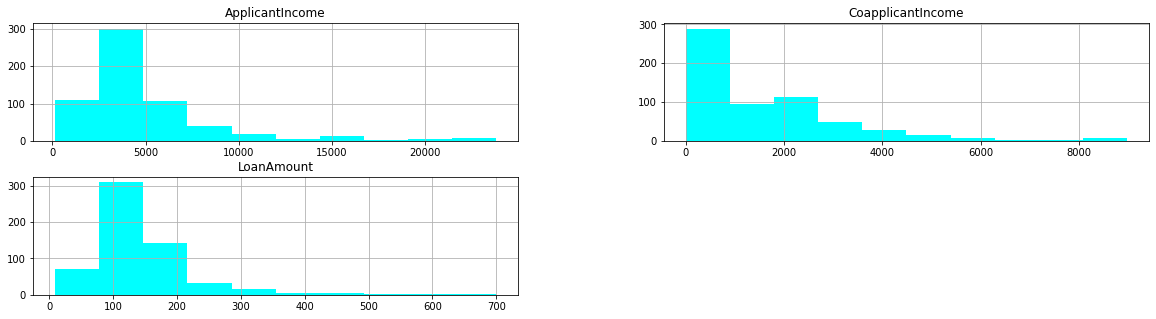

In [16]:
# Plotting after Outliar treatment
LoanDF[Conti].hist(figsize=(20,5),color='cyan')

* Categorical Predictors

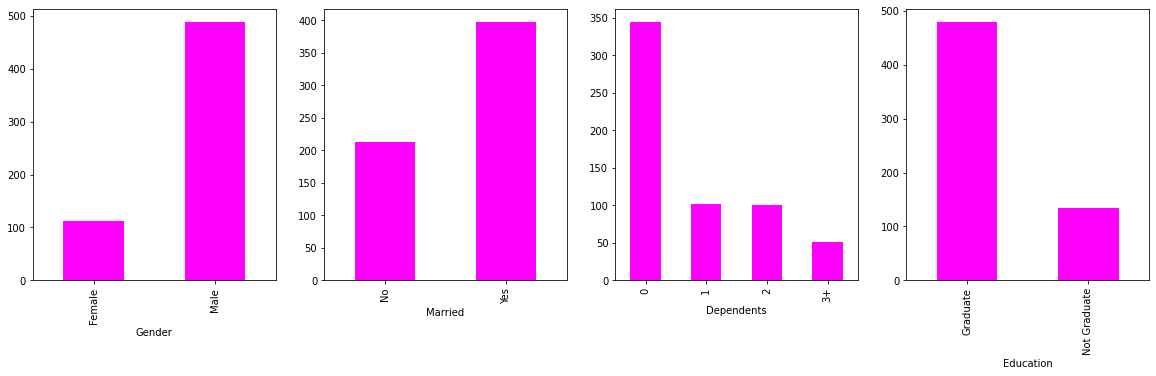

In [17]:
fig,subplot=plt.subplots(nrows=1,ncols=4,figsize=(20,5))

for i,j in zip(Categ,range(4)):
    LoanDF.groupby(i).size().plot(kind='bar',ax=subplot[j],color='magenta')

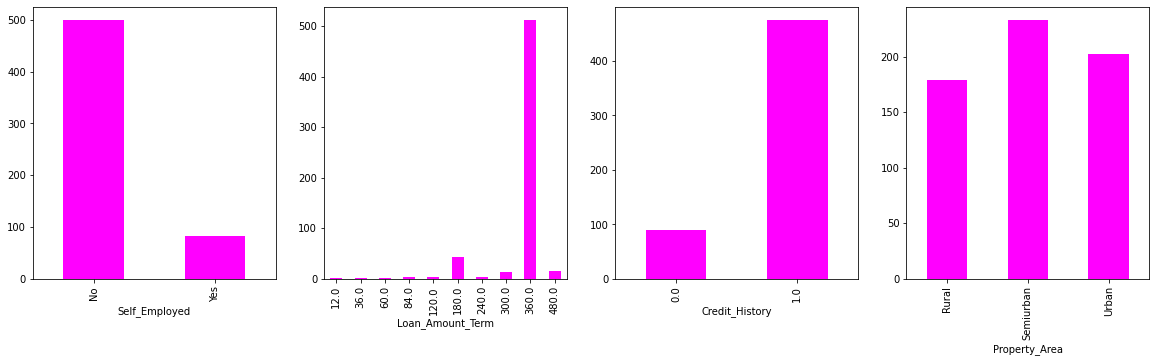

In [18]:
fig,subplot=plt.subplots(nrows=1,ncols=4,figsize=(20,5))

for i,j in zip(Categ[4:],range(4)):
    LoanDF.groupby(i).size().plot(kind='bar',ax=subplot[j],color='magenta')

* Treatment needed for Imbalanced Column Loan_Amount_Term

In [19]:
LoanDF['Loan_Amount_Term'][LoanDF['Loan_Amount_Term']<=180]=180.0

In [20]:
LoanDF['Loan_Amount_Term'][LoanDF['Loan_Amount_Term']==240]=300.0

<AxesSubplot:xlabel='Loan_Amount_Term'>

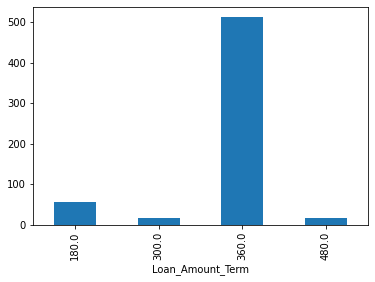

In [21]:
LoanDF.groupby('Loan_Amount_Term').size().plot(kind='bar')

#### Analysis Result
* Selected Continuous Predictors:- All
* Selected Categorical Predictors:- All,(except) Loan_amount_term its having imbalance distribution even after treatmet,it can be confirmed further in Statistical Analysis

### Treating Missing Values

In [22]:
LoanDF[Conti].isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [23]:
LoanDF['LoanAmount'].fillna(LoanDF['LoanAmount'].median(),inplace=True)

In [24]:
LoanDF[Categ].isna().sum() 

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
dtype: int64

In [25]:
for i in range(8):
    LoanDF[Categ[i]].fillna(LoanDF[Categ[i]].mode()[0],inplace=True)

In [26]:
LoanDF.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Bivariate Analysis
* Continuous Vs Categorical

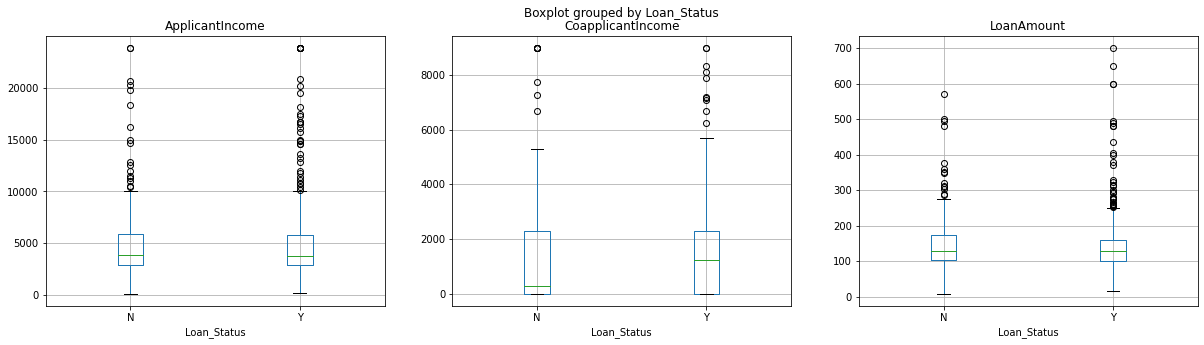

In [27]:
fig,subplot=plt.subplots(1,3,figsize=(20,5))
for i,j in zip(Conti,range(3)):
    LoanDF.boxplot(by=Target,column=i,ax=subplot[j])

#### ANOVA Test (Statistical analysis for correlation )

In [28]:
def fun_anova(df,pred,target):
    from scipy.stats import f_oneway
    selected_conti=[]
    for i in pred:
        inp=df.groupby(target)[i].apply(list)
        
        anov=f_oneway(*inp)
        
        if anov[1]<0.05:
            print("Column {} is correlated with Target | P-value :{} ".format(i,anov[1]))
            selected_conti.append(i)
        
        else:
            print("Column {} is NOT correlated with Target | P-value :{} ".format(i,anov[1]))
            
    return selected_conti

fun_anova(LoanDF,Conti,Target)
      

Column ApplicantIncome is NOT correlated with Target | P-value :0.9529534007092838 
Column CoapplicantIncome is NOT correlated with Target | P-value :0.9011685371080465 
Column LoanAmount is NOT correlated with Target | P-value :0.41132365467797827 


[]

* ANOVA test Rejected all the Continuous Variables

* Categorical vs Categorical

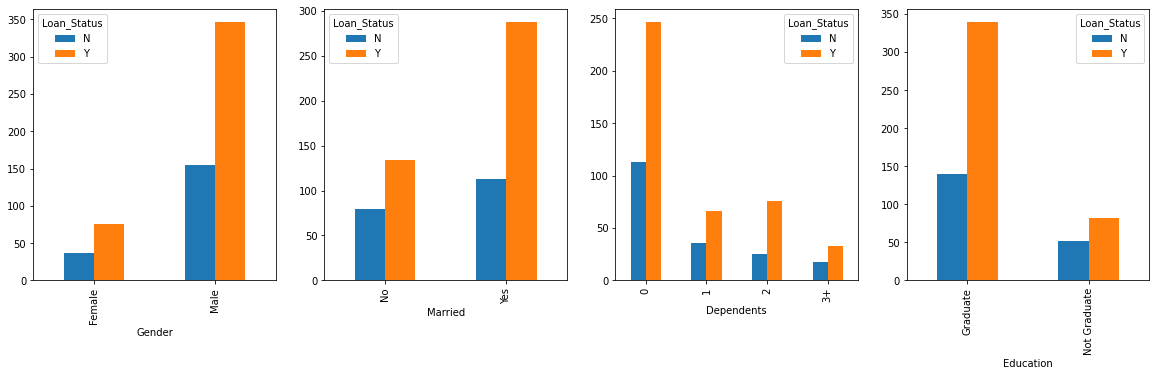

In [29]:
fig,subplot=plt.subplots(1,4,figsize=(20,5))

for i,j in zip(Categ,range(4)):
    pd.crosstab(index=LoanDF[i],columns=LoanDF[Target]).plot(kind='bar',ax=subplot[j])

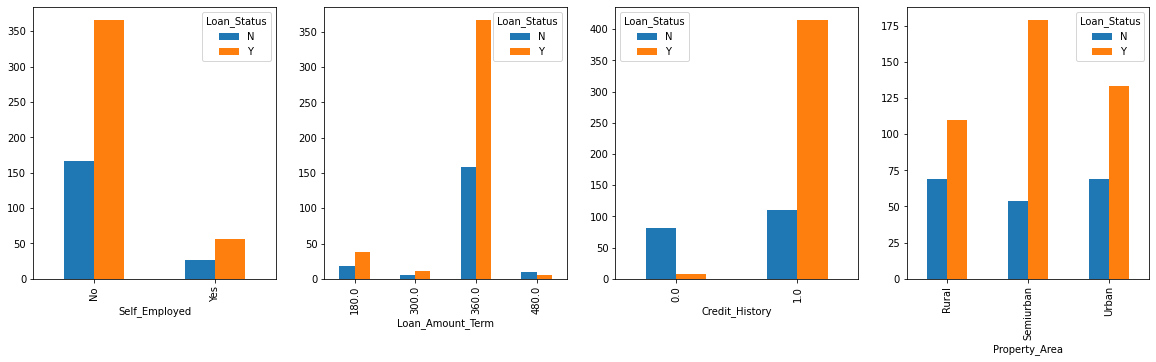

In [30]:

fig,subplot=plt.subplots(1,4,figsize=(20,5))

for i,j in zip(Categ[4:],range(4)):
    pd.crosstab(index=LoanDF[i],columns=LoanDF[Target]).plot(kind='bar',ax=subplot[j])

### Chi2 Test (Statistical Analysis for Categ vs Categ)

In [31]:
def fun_ch2(df,pred,target):
    from scipy.stats import chi2_contingency
    
    selected_categ=[]
    
    for i in pred:
        inp=pd.crosstab(index=df[i],columns=df[target])
        
        chi2=chi2_contingency(inp)
        
        if chi2[1]<0.05:
            print("Column {} is correlated with Target | P-value :{} ".format(i,chi2[1]))
            selected_categ.append(i)
        
        else:
            print("Column {} is NOT correlated with Target | P-value :{} ".format(i,chi2[1]))
            
    return selected_categ


fun_ch2(LoanDF,Categ,Target)

        

Column Gender is NOT correlated with Target | P-value :0.7391461310869638 
Column Married is correlated with Target | P-value :0.029608580862582116 
Column Dependents is NOT correlated with Target | P-value :0.3688663081366005 
Column Education is correlated with Target | P-value :0.04309962129357355 
Column Self_Employed is NOT correlated with Target | P-value :1.0 
Column Loan_Amount_Term is NOT correlated with Target | P-value :0.10342497171561134 
Column Credit_History is correlated with Target | P-value :3.4183499979091188e-40 
Column Property_Area is correlated with Target | P-value :0.0021360187811644937 


['Married', 'Education', 'Credit_History', 'Property_Area']

* Final Selected Predictors :- ['Married', 'Education', 'Credit_History', 'Property_Area']

### Extracting Data for ML


In [32]:
LoanML=LoanDF[['Married', 'Education', 'Credit_History', 'Property_Area']]
LoanML[Target]=LoanDF[Target]
LoanML.head()

,Married,Education,Credit_History,Property_Area,Loan_Status
0,No,Graduate,1.0,Urban,Y
1,Yes,Graduate,1.0,Rural,N
2,Yes,Graduate,1.0,Urban,Y
3,Yes,Not Graduate,1.0,Urban,Y
4,No,Graduate,1.0,Urban,Y


In [33]:
# LoanML.to_pickle('loan_final.pkl')

### Preparing Data for ML
* Converting Nominal/Ordinal Categorical to Numerical

In [34]:
LoanML['Married'].replace({'No':0,'Yes':1},inplace=True)

In [35]:
LoanML['Education'].replace({'Not Graduate':0,'Graduate':1},inplace=True)

In [36]:
LoanML['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [37]:
LoanML=pd.get_dummies(LoanML)
LoanML.head()

,Married,Education,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1.0,1,0,0,1
1,1,1,1.0,0,1,0,0
2,1,1,1.0,1,0,0,1
3,1,0,1.0,1,0,0,1
4,0,1,1.0,1,0,0,1


In [38]:
Final_pred=list(LoanML.columns)
Final_pred.remove(Target)

* Standardization / Normalization of Data

In [127]:
X=LoanML[Final_pred].values
y=LoanML[Target].values

In [128]:
X
# No need to standardize / Normalize the data its already good

array([[0., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 1.],
       ...,
       [1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.]])

* Spliting Data Into Train and Test

In [129]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep='\n')

(429, 6)
(185, 6)
(429,)
(185,)


### Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

F1- Score Of fittedt model is :  0.7564817361302097
[0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]
Final Average Accuarcy of Model is :  0.7837334626268413


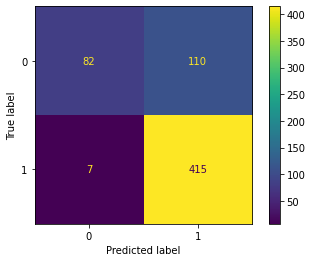

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

LR=LogisticRegression(C=5,penalty='l1',solver='liblinear')
LR.fit(X_train,y_train)

predLR=LR.predict(X_test)

print(classification_report(y_test,predLR))
print("F1- Score Of fittedt model is : ",f1_score(y_test,predLR,average='weighted'))
print(metrics.plot_confusion_matrix(LR,X,y))

# Cross Validation

cv=cross_val_score(LR,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average Accuarcy of Model is : ",np.mean(cv))




In [131]:
# from sklearn.model_selection import GridSearchCV
# params={'C':[0.1,1,5,10,100],'penalty':['l1','l2'],'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
# gcv=GridSearchCV(estimator=LR,param_grid=params,cv=10,scoring='f1_weighted')

# gcv.fit(X_train,y_train)
# gcv.best_params_
# gcv.best_score_


### Decision Trees


In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parms={'max_depth':[i for i in range(3,16)],'criterion':['entropy','gini']}
DT=DecisionTreeClassifier()
gcv=GridSearchCV(estimator=DT,param_grid=parms,cv=10,scoring='f1_weighted')
gcv.fit(X,y)
print(gcv.best_params_,gcv.best_score_,sep='\n')

{'criterion': 'entropy', 'max_depth': 3}
0.7837334626268413


              precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

F1- Score Of fittedt model is :  0.7564817361302097


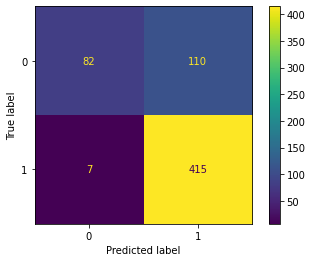

[0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]
Final Average Accuarcy of Model is :  0.7837334626268413
Accuracy score on Test is : 0.7837837837837838


<AxesSubplot:>

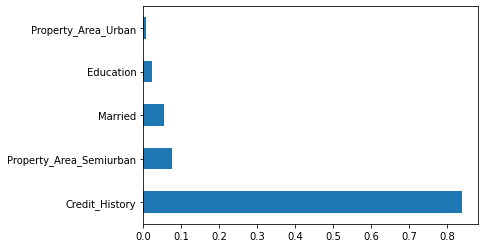

In [133]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=3,criterion='entropy')
DT.fit(X_train,y_train)

predDT=DT.predict(X_test)

print(classification_report(y_test,predDT))
print("F1- Score Of fittedt model is : ",f1_score(y_test,predDT,average='weighted'))
print(metrics.plot_confusion_matrix(DT,X,y))
plt.show()

# Cross Validation

cv=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average Accuarcy of Model is : ",np.mean(cv))
print("Accuracy score on Test is :",metrics.accuracy_score(y_test,predDT))

# feature importance
features=pd.Series(DT.feature_importances_,index=Final_pred)
features.nlargest(5).plot(kind='barh')


#### Most Important feature for DT is Cedit_History
